In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996
inr, = np.where(tr[:,0]<13)
ins, = np.where(ts[:,0]<10)
outs,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))
outr,= np.where((tr[:,0]<30) & (tr[:,0]>25 ))

APLICO LOS FILTROS DE RESOLUCION EN GAS

In [41]:
gs_r, = np.where(tr[:,6]>56)
gs_s, = np.where(ts[:,6]>106)

In [42]:
dist_r    = tr[gs_r,0]
dist_s    = ts[gs_s,0]
frac_gs_r = (tr[gs_r,6]*masa_gs)/(tr[gs_r,7]*masa_dm)
frac_gs_s = (tr[gs_s,6]*masa_gs)/(tr[gs_s,7]*masa_dm)

In [43]:
abin=2
bines=np.arange(4,40,abin)
xr=[]; dxr=[]; yr=[]; dyr=[]
xs=[]; dxs=[]; ys=[]; dys=[]

for i in bines:
    rango_r, = np.where((dist_r > i) & (dist_r < i + abin))
    yr.append(np.mean(frac_gs_r[rango_r]))
    dyr.append(std(frac_gs_r[rango_r]))
    xr.append(np.mean(dist_r[rango_r]))
    dxr.append(np.mean(dist_r[rango_r]))
    
    rango_s, = np.where((dist_s > i) & (dist_s < i + abin))
    ys.append(np.mean(frac_gs_s[rango_s]))
    dys.append(std(frac_gs_s[rango_s]))
    xs.append(np.mean(dist_s[rango_s]))
    dxs.append(np.mean(dist_s[rango_s]))

    
yr=np.array(yr)
dry=np.array(dyr)
xr=np.array(xr)
dxr=np.array(dxr)

ys=np.array(ys)
drs=np.array(dys)
xs=np.array(xs)
dxs=np.array(dxs)

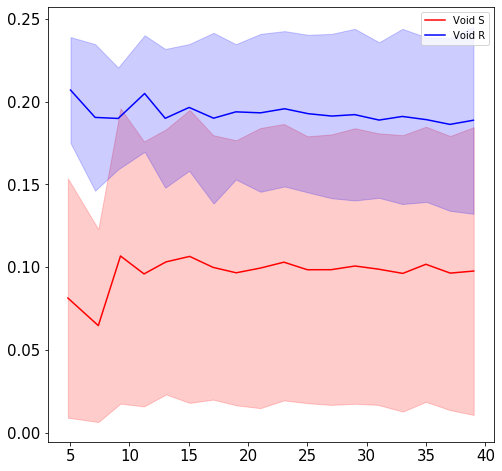

In [44]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)
axis_font = {'fontname':'Arial', 'size':'14'}

plt.figure(figsize=(8,8))
plt.plot(xs,ys,color='red',label='Void S')
plt.fill_between(xs, ys - dys, ys + dys,color='red', alpha=0.2)

plt.plot(xr,yr,color='blue',label='Void R')
plt.fill_between(xr, yr - dyr, yr + dyr,color='blue', alpha=0.2)

plt.legend()